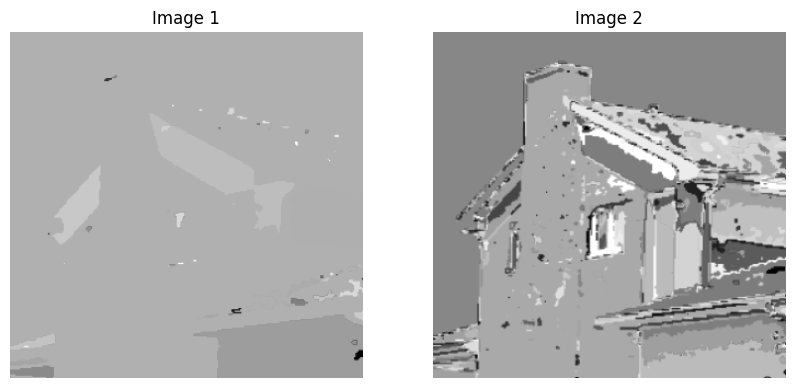

Q value for Image 1: 3.2540840524696864e-05, Q value for Image 2: 0.0005574071967172103


In [11]:
import numpy as np
import cv2  # For image loading and processing
import matplotlib.pyplot as plt  # For plotting images
%matplotlib inline

def calculate_color_error(image, region_mask):
    """
    Calculate the color error for a given region in an image.
    """
    region_image = image[region_mask]
    mean_gray_level = np.mean(region_image)
    color_error = mean_gray_level - region_image
    return np.sum(color_error ** 2)  # Sum of squared errors in the region

def Q(I, regions):
    """
    Calculate Q for a given image I and a list of regions.
    """
    Na = I.size  # number of pixels in I
    n = len(regions)  # number of regions

    sum_term = 0
    for region_mask in regions:
        Rj = I[region_mask]  # Pixels in jth region
        L_Rj = Rj.size  # number of pixels in jth region
        ej = calculate_color_error(I, region_mask)
        M_L_Rj = np.mean(Rj)  # mean pixel value in jth region

        sum_term += ej / (1 + np.log(L_Rj)) * M_L_Rj / L_Rj

    Q = 1/(1000*Na) * sum_term
    return Q

def generate_regions(image_shape, num_regions):
    """
    Generate unique regions for an image.
    """
    total_pixels = image_shape[0] * image_shape[1]
    pixels_per_region = total_pixels // num_regions
    indices = np.arange(total_pixels)
    np.random.shuffle(indices)

    regions = []
    for i in range(num_regions):
        region_mask = np.zeros(total_pixels, dtype=bool)
        start_idx = i * pixels_per_region
        if i == num_regions - 1:  # Last region takes the remainder
            end_idx = total_pixels
        else:
            end_idx = start_idx + pixels_per_region
        region_mask[indices[start_idx:end_idx]] = True
        region_mask = region_mask.reshape(image_shape)
        regions.append(region_mask)

    return regions

def compare_segmentations(image1, image2, num_regions=5):
    """
    Compare two segmented images using the Q function and plot them.
    """
    # Load images as grayscale
    I1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
    I2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)

    # Resize images to match the smaller one's dimensions if they are not the same
    if I1.shape != I2.shape:
        new_size = (min(I1.shape[1], I2.shape[1]), min(I1.shape[0], I2.shape[0]))  # width, height
        I1 = cv2.resize(I1, new_size, interpolation=cv2.INTER_AREA)
        I2 = cv2.resize(I2, new_size, interpolation=cv2.INTER_AREA)

    # Plotting the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(I1, cmap='gray')
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(I2, cmap='gray')
    plt.title('Image 2')
    plt.axis('off')

    plt.show()

    # Generate regions
    regions = generate_regions(I1.shape, num_regions)

    # Calculate Q for both images
    Q1 = Q(I1, regions)
    Q2 = Q(I2, regions)

    return Q1, Q2

# Example usage
image1_path = 'static\img_a.png'
image2_path = 'static\img_b.png'
Q1, Q2 = compare_segmentations(image1_path, image2_path, num_regions=5)
print(f"Q value for Image 1: {Q1}, Q value for Image 2: {Q2}")


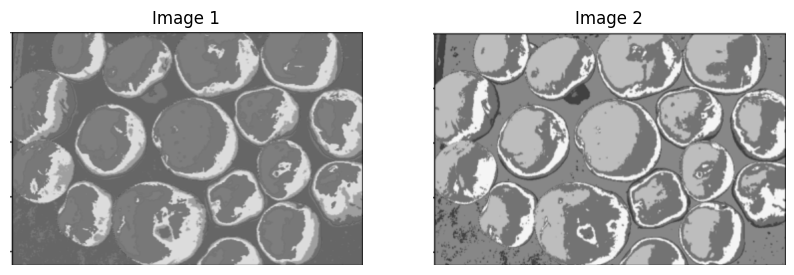

Q value for Image 1: 5.95408185749293e-05, Q value for Image 2: 6.553363516531024e-05


In [4]:
import numpy as np
import cv2  # For image loading and processing
import matplotlib.pyplot as plt  # For plotting images
%matplotlib inline

def calculate_color_error(image, region_mask):
    """
    Calculate the color error for a given region in an image.
    """
    region_image = image[region_mask]
    mean_gray_level = np.mean(region_image)
    color_error = mean_gray_level - region_image
    return np.sum(color_error ** 2)  # Sum of squared errors in the region

def Q(I, regions):
    """
    Calculate Q for a given image I and a list of regions, according to the updated equation.
    """
    Na = I.size  # number of pixels in I
    n = len(regions)  # number of regions

    sum_term = 0
    for region_mask in regions:
        Rj = I[region_mask]  # Pixels in jth region
        L_Rj = Rj.size  # number of pixels in jth region
        ej = calculate_color_error(I, region_mask)
        M_L_Rj = np.mean(Rj)  # mean pixel value in jth region

        sum_term += (ej / (1 + np.log(L_Rj)) + (M_L_Rj / L_Rj) ** 2)

    Q_value = (1 / (1000 * Na)) * np.sqrt(n) * np.sqrt(sum_term)
    return Q_value


def generate_regions(image_shape, num_regions):
    """
    Generate unique regions for an image.
    """
    total_pixels = image_shape[0] * image_shape[1]
    pixels_per_region = total_pixels // num_regions
    indices = np.arange(total_pixels)
    np.random.shuffle(indices)

    regions = []
    for i in range(num_regions):
        region_mask = np.zeros(total_pixels, dtype=bool)
        start_idx = i * pixels_per_region
        if i == num_regions - 1:  # Last region takes the remainder
            end_idx = total_pixels
        else:
            end_idx = start_idx + pixels_per_region
        region_mask[indices[start_idx:end_idx]] = True
        region_mask = region_mask.reshape(image_shape)
        regions.append(region_mask)

    return regions

def compare_segmentations(image1, image2, num_regions=5):
    """
    Compare two segmented images using the Q function and plot them.
    """
    # Load images as grayscale
    I1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
    I2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)

    # Resize images to match the smaller one's dimensions if they are not the same
    if I1.shape != I2.shape:
        new_size = (min(I1.shape[1], I2.shape[1]), min(I1.shape[0], I2.shape[0]))  # width, height
        I1 = cv2.resize(I1, new_size, interpolation=cv2.INTER_AREA)
        I2 = cv2.resize(I2, new_size, interpolation=cv2.INTER_AREA)

    # Plotting the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(I1, cmap='gray')
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(I2, cmap='gray')
    plt.title('Image 2')
    plt.axis('off')

    plt.show()

    # Generate regions
    regions = generate_regions(I1.shape, num_regions)

    # Calculate Q for both images
    Q1 = Q(I1, regions)
    Q2 = Q(I2, regions)

    return Q1, Q2

# Example usage
image1_path = 'static\centroid_7_49_firefly1.png'
image2_path = 'static\centroid_6_36_firefly1.png'
Q1, Q2 = compare_segmentations(image1_path, image2_path, num_regions=5)
print(f"Q value for Image 1: {Q1}, Q value for Image 2: {Q2}")

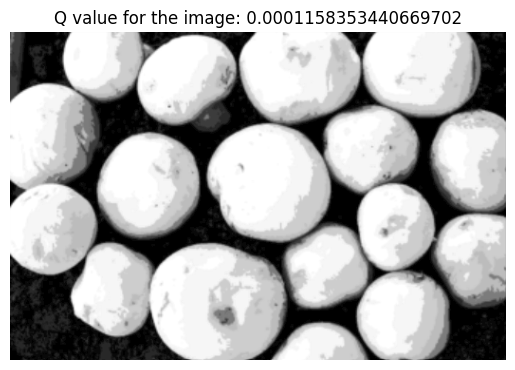

In [10]:
import numpy as np
import cv2  # For image loading and processing
import matplotlib.pyplot as plt  # For displaying images
%matplotlib inline

def calculate_color_error(image, region_mask):
    """
    Calculate the color error for a given region in an image.
    """
    region_image = image[region_mask]
    mean_gray_level = np.mean(region_image)
    color_error = mean_gray_level - region_image
    return np.sum(color_error ** 2)  # Sum of squared errors in the region

def Q(I, regions):
    """
    Calculate Q for a given image I and a list of regions.
    """
    Na = I.size  # number of pixels in I
    n = len(regions)  # number of regions

    sum_term = 0
    for region_mask in regions:
        Rj = I[region_mask]  # Pixels in jth region
        L_Rj = Rj.size  # number of pixels in jth region
        ej = calculate_color_error(I, region_mask)
        M_L_Rj = np.mean(Rj)  # mean pixel value in jth region

        sum_term += (ej / (1 + np.log(L_Rj)) + (M_L_Rj / L_Rj) ** 2)

    Q_value = (1 / (1000 * Na)) * np.sqrt(n) * np.sqrt(sum_term)
    return Q_value

def generate_regions(image_shape, num_regions):
    """
    Generate unique regions for an image.
    """
    total_pixels = image_shape[0] * image_shape[1]
    pixels_per_region = total_pixels // num_regions
    indices = np.arange(total_pixels)
    np.random.shuffle(indices)

    regions = []
    for i in range(num_regions):
        region_mask = np.zeros(total_pixels, dtype=bool)
        start_idx = i * pixels_per_region
        if i == num_regions - 1:  # Last region takes the remainder
            end_idx = total_pixels
        else:
            end_idx = start_idx + pixels_per_region
        region_mask[indices[start_idx:end_idx]] = True
        region_mask = region_mask.reshape(image_shape)
        regions.append(region_mask)

    return regions

def calculate_image_Q(image_path, num_regions=5):
    """
    Calculate the Q value for a single image given its path.
    """
    # Load image as grayscale
    I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Generate regions
    regions = generate_regions(I.shape, num_regions)

    # Calculate Q for the image
    Q_value = Q(I, regions)

    # Display the image
    plt.imshow(I, cmap='gray')
    plt.title(f"Q value for the image: {Q_value}")
    plt.axis('off')  # Hide axes
    plt.show()

    return Q_value

# Example usage
image_path = 'static\qfunction\gwo3.png'  # Replace with your image path
Q_value = calculate_image_Q(image_path, num_regions=5)
